In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загрузка данных
df = pd.read_csv("winequality-red.csv")
df
# Анализ данных


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Анализ атрибута: fixed acidity
  Среднее: 8.32, Стандартное отклонение: 1.74


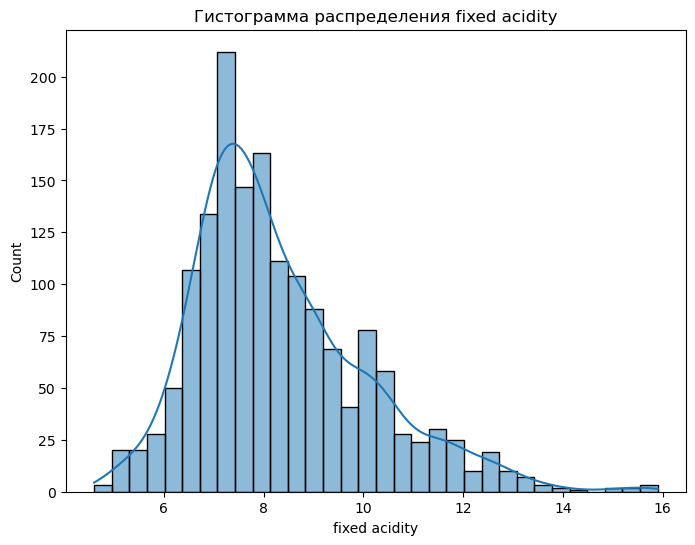

  Количество выбросов (IQR): 49
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: volatile acidity
  Среднее: 0.53, Стандартное отклонение: 0.18


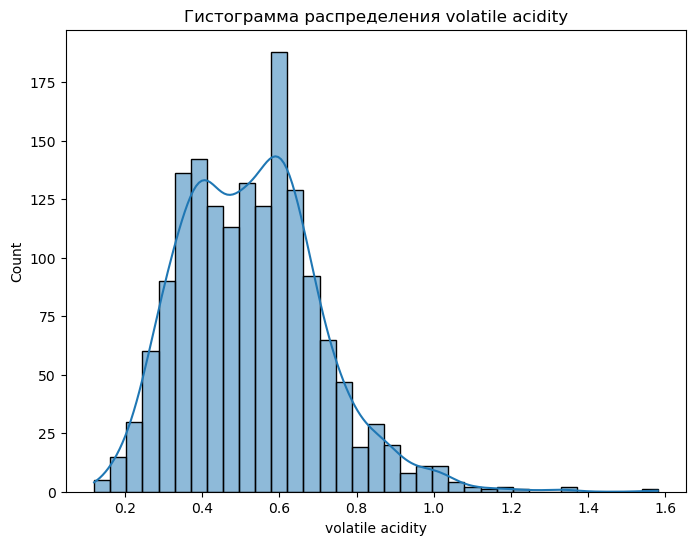

  Количество выбросов (IQR): 19
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: citric acid
  Среднее: 0.27, Стандартное отклонение: 0.19


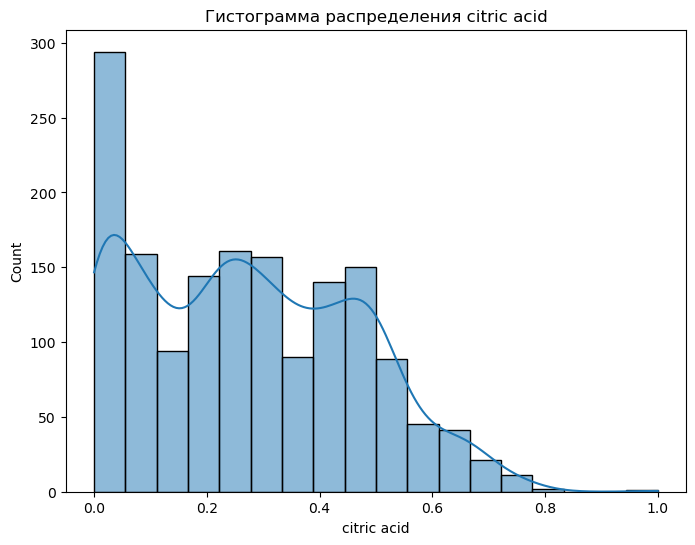

  Количество выбросов (IQR): 1
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: residual sugar
  Среднее: 2.54, Стандартное отклонение: 1.41


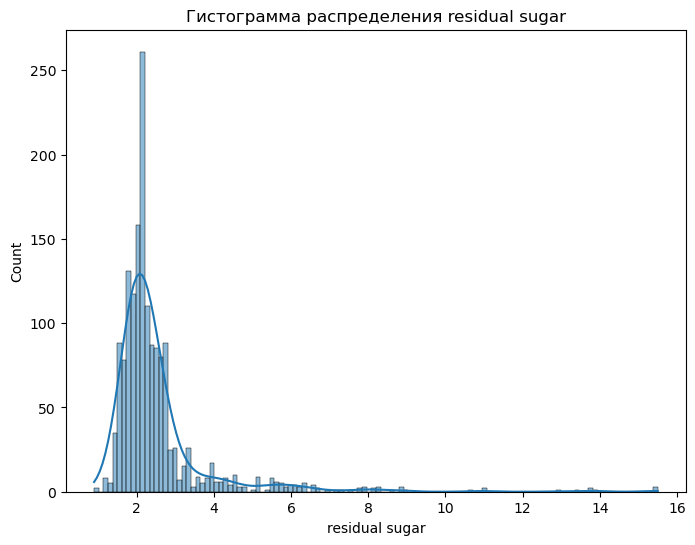

  Количество выбросов (IQR): 155
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: chlorides
  Среднее: 0.09, Стандартное отклонение: 0.05


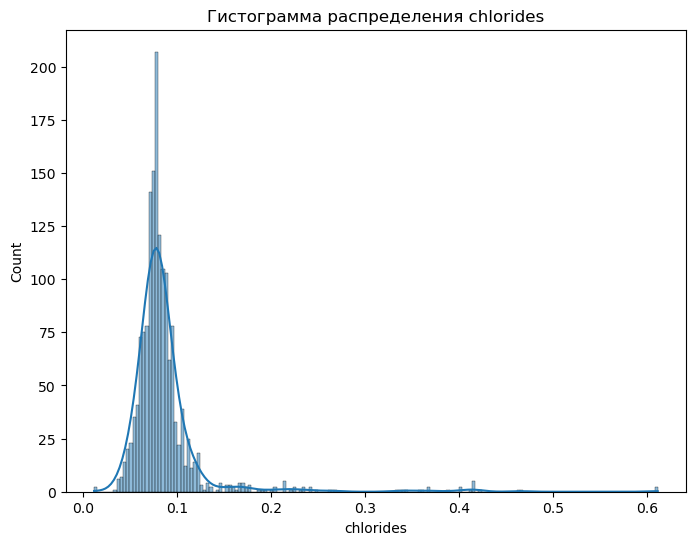

  Количество выбросов (IQR): 112
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: free sulfur dioxide
  Среднее: 15.87, Стандартное отклонение: 10.46


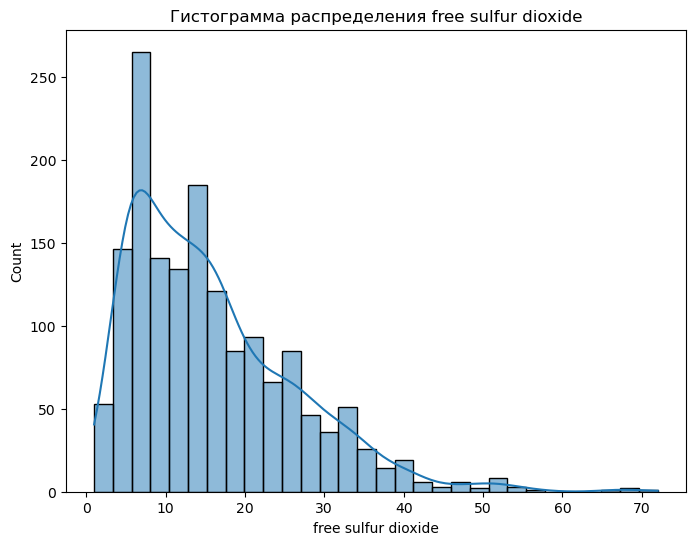

  Количество выбросов (IQR): 30
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: total sulfur dioxide
  Среднее: 46.47, Стандартное отклонение: 32.90


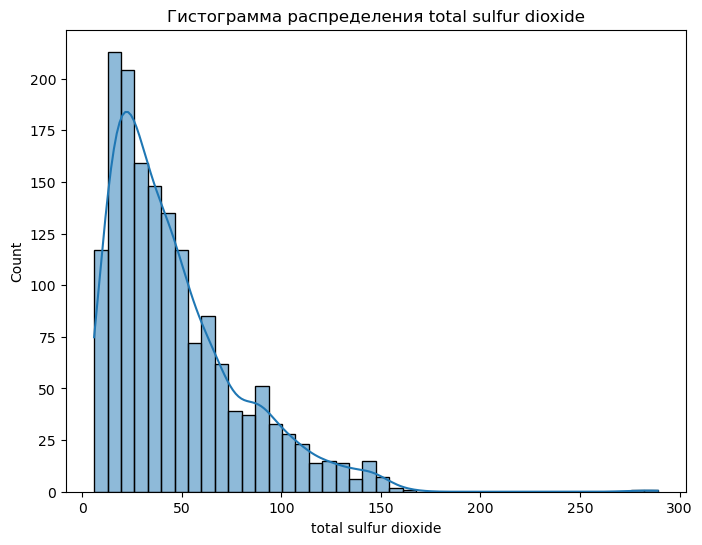

  Количество выбросов (IQR): 55
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: density
  Среднее: 1.00, Стандартное отклонение: 0.00


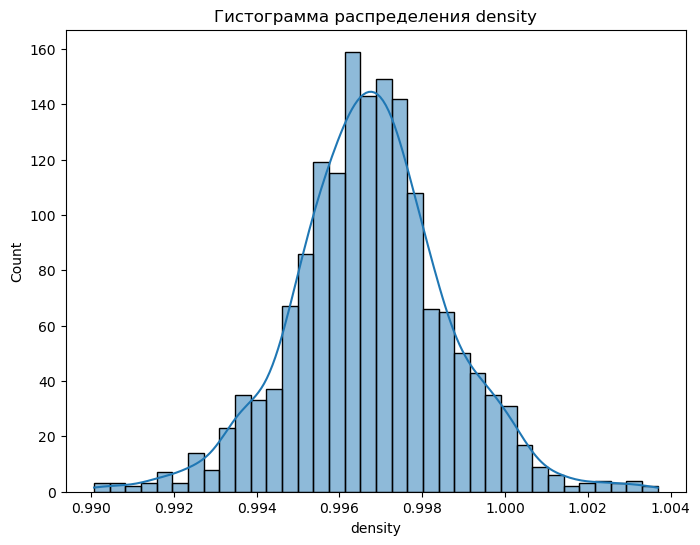

  Количество выбросов (IQR): 45
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: pH
  Среднее: 3.31, Стандартное отклонение: 0.15


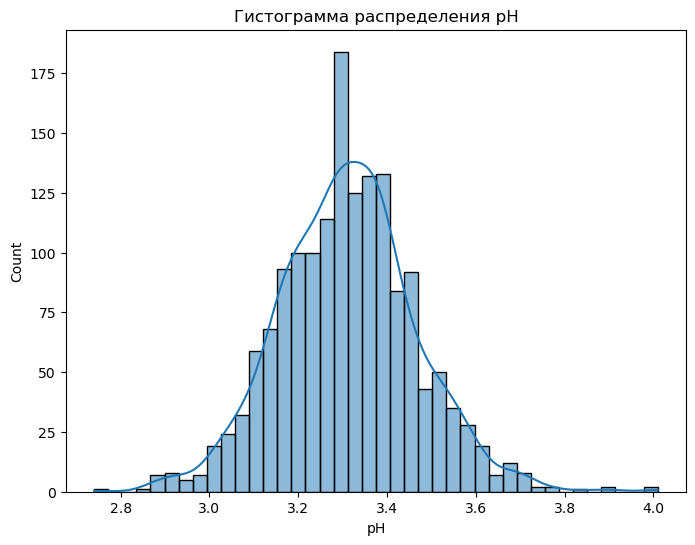

  Количество выбросов (IQR): 35
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: sulphates
  Среднее: 0.66, Стандартное отклонение: 0.17


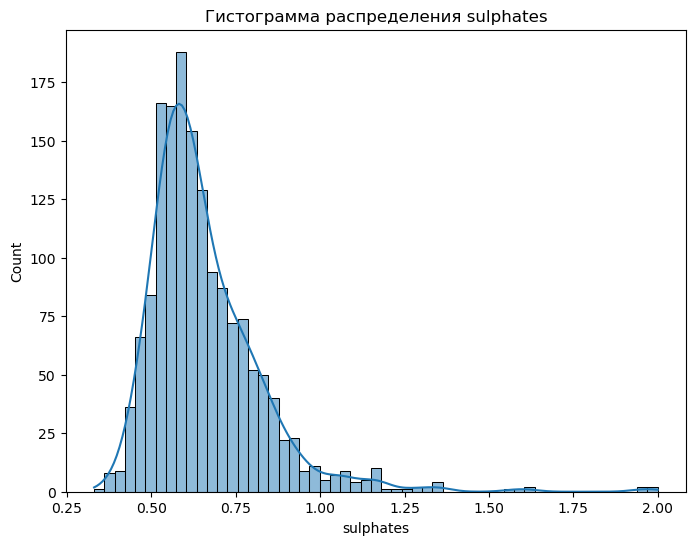

  Количество выбросов (IQR): 59
  Количество пропущенных значений: 0
--------------------
Анализ атрибута: alcohol
  Среднее: 10.42, Стандартное отклонение: 1.07


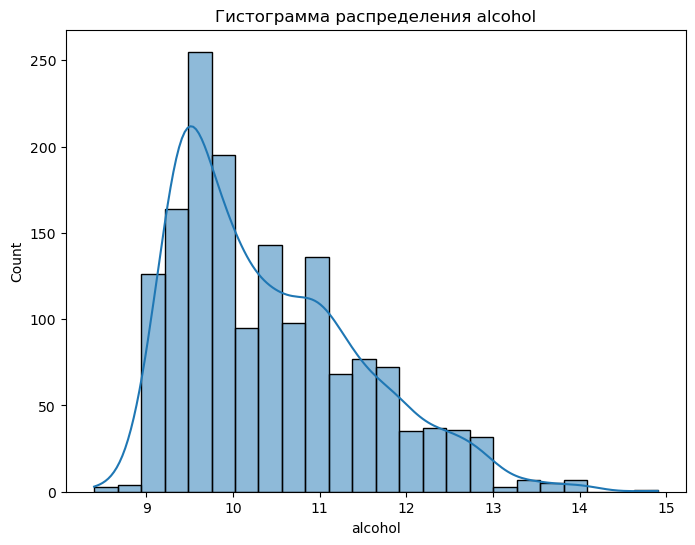

  Количество выбросов (IQR): 13
  Количество пропущенных значений: 0
--------------------


In [5]:
# Цикл по всем атрибутам (кроме 'quality')
for col in df.columns[:-1]:
    print(f"Анализ атрибута: {col}")
    
    # Среднее значение и стандартное отклонение
    mean = df[col].mean()
    std = df[col].std()
    print(f"  Среднее: {mean:.2f}, Стандартное отклонение: {std:.2f}")
    
    # Гистограмма распределения
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Гистограмма распределения {col}")
    plt.show()
    
    # Выбросы (с помощью метода IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"  Количество выбросов (IQR): {len(outliers)}")

    # Пропущенные значения
    missing_values = df[col].isnull().sum()
    print(f"  Количество пропущенных значений: {missing_values}")
    
    # Предложение по обработке пропущенных значений (в данном случае нет пропущенных)
    if missing_values > 0:
        print("  Предложение по обработке пропущенных значений:  Заполнение медианой или средним значением.")
    print("-" * 20)


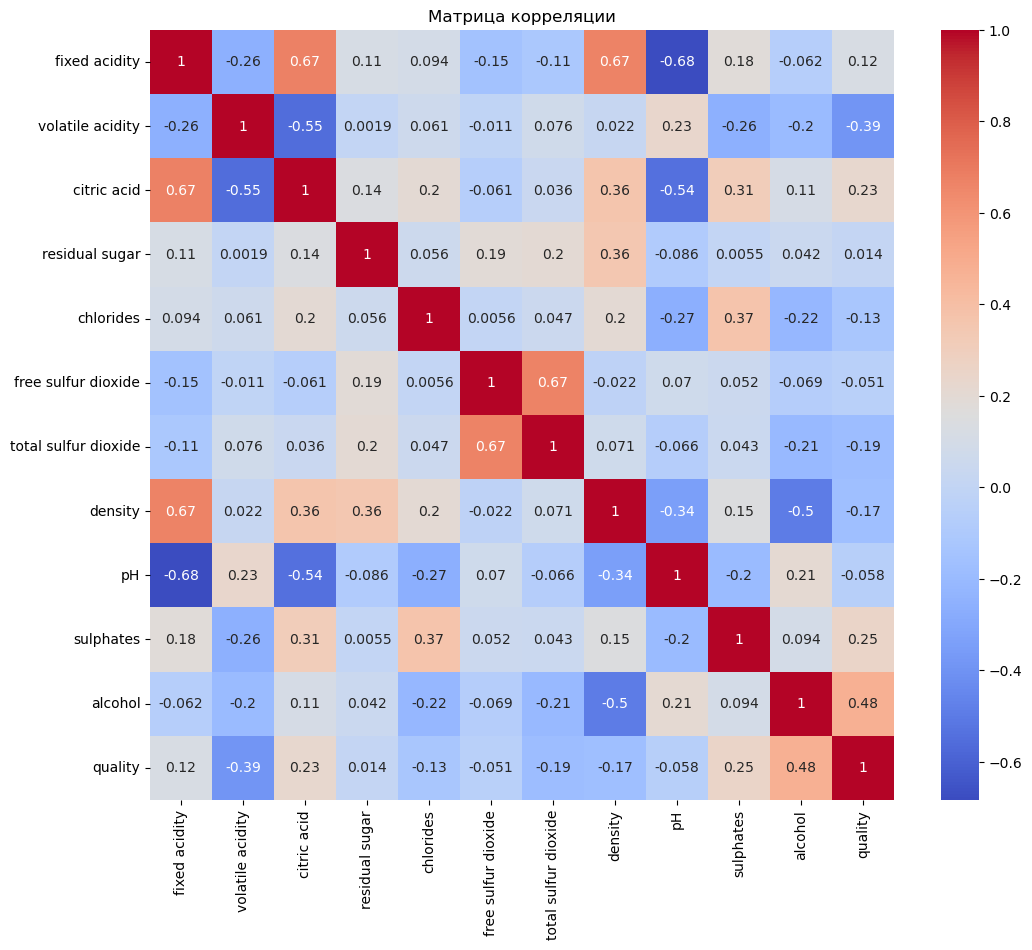

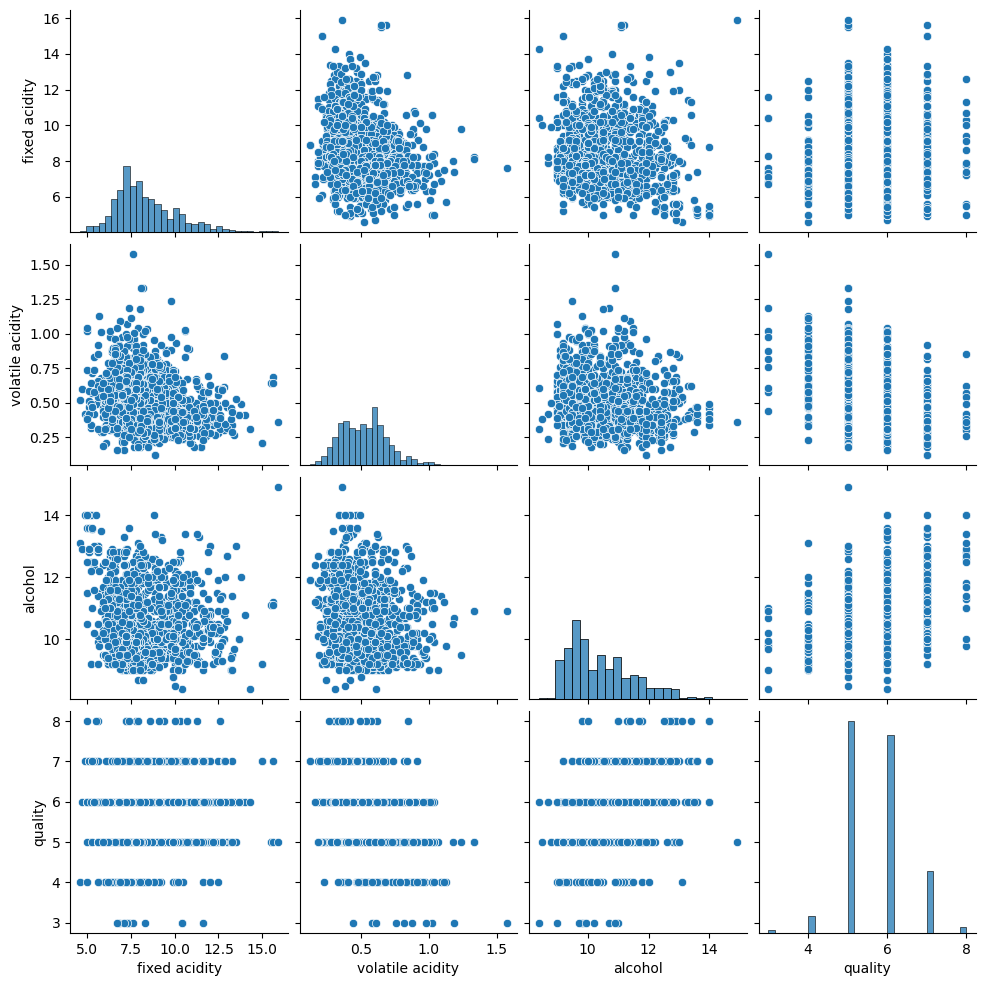

Анализ корреляции:
Высокая корреляция между fixed acidity и citric acid: 0.67
Высокая корреляция между fixed acidity и density: 0.67
Высокая корреляция между fixed acidity и pH: -0.68
Высокая корреляция между volatile acidity и citric acid: -0.55
Высокая корреляция между citric acid и fixed acidity: 0.67
Высокая корреляция между citric acid и volatile acidity: -0.55
Высокая корреляция между citric acid и pH: -0.54
Высокая корреляция между free sulfur dioxide и total sulfur dioxide: 0.67
Высокая корреляция между total sulfur dioxide и free sulfur dioxide: 0.67
Высокая корреляция между density и fixed acidity: 0.67
Высокая корреляция между pH и fixed acidity: -0.68
Высокая корреляция между pH и citric acid: -0.54


In [19]:
# Матрица корреляции
correlation_matrix = df.corr()

# Тепловая карта корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

# Матрица графиков рассеяния (для наглядности выберем несколько пар атрибутов)
sns.pairplot(df[['fixed acidity', 'volatile acidity', 'alcohol', 'quality']])
plt.show()

# Анализ корреляции
print("Анализ корреляции:")
for col1 in correlation_matrix.columns:
 for col2 in correlation_matrix.columns:
  if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.5:
   print(f'Высокая корреляция между {col1} и {col2}: {correlation_matrix.loc[col1, col2]:.2f}')
